In [1]:
import matplotlib.pyplot as plt
import os
from pygimli.viewer.mpl import generateMatrix
from PIL import Image
from numpy import asarray
import numpy as np
from pygimli.meshtools import quality
import random 
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert



In [2]:
left = -48
right = 48
depth = 25 

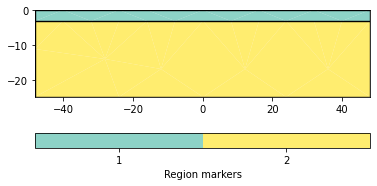

In [3]:
world = mt.createWorld(start=[left, 0], 
                    end=[right, -depth], 
                    layers=[-3])

line = mt.createLine(start=[left, -3], end=[right, -25])

block = mt.createCircle(pos=[30, -13.], radius=[6, 1.3], marker=3,
                        boundaryMarker=10, area=0.1, interpolate="spline")

geometry = world + line + block
pg.show(geometry);

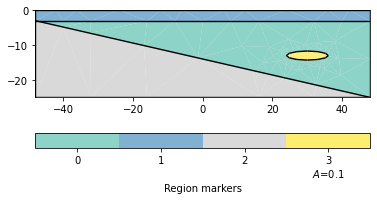

In [9]:
pg.show(geometry);
plt.savefig("MODEL1.jpg",dpi=1200, bbox_inches="tight") 

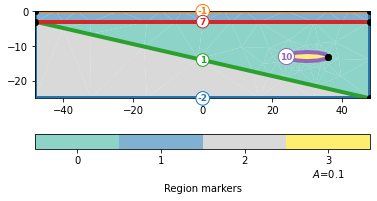

In [10]:
pg.show(geometry, boundaryMarkers=True);

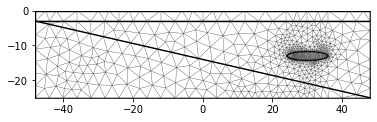

In [11]:
mesh = mt.createMesh(geometry, quality = 33.5, area= 10, smooth=True)
pg.show(mesh);
plt.savefig("MODEL2.jpg",dpi=1200, bbox_inches="tight") 

In [12]:
scheme = ert.createData(elecs=np.linspace(start=-48, stop=48, num=48),
                           schemeName='dd')
# the same electrod configuration used in the previous article


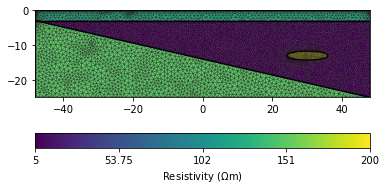

In [13]:
for p in scheme.sensors():
    geometry.createNode(p)
    geometry.createNode(p - [0, 0.1])

# Create a mesh for the finite element modelling with appropriate mesh quality.
mesh = mt.createMesh(geometry, quality=34, area= 1, smooth=True)

# Create a map to set resistivity values in the appropriate regions
# [[regionNumber, resistivity], [regionNumber, resistivity], [...]
rhomap = [[0, 5.],
          [1, 125.],
          [2, 150.],
          [3, 200.]]

# Take a look at the mesh and the resistivity distribution
pg.show(mesh, data=rhomap, label=pg.unit('res'), showMesh=True)
plt.savefig("MODEL5.jpg",dpi=1200, bbox_inches="tight") 

In [14]:
data = ert.simulate(mesh, scheme=scheme, res=rhomap, noiseLevel=1,
                    noiseAbs=1e-6, seed=1444)

pg.info(np.linalg.norm(data['err']), np.linalg.norm(data['rhoa']))
pg.info('Simulated data', data)
pg.info('The data contains:', data.dataMap().keys())

pg.info('Simulated rhoa (min/max)', min(data['rhoa']), max(data['rhoa']))
pg.info('Selected data noise %(min/max)', min(data['err'])*100, max(data['err'])*100)

02/12/22 - 15:28:26 - pyGIMLi - INFO - Calculate geometric factors.
02/12/22 - 15:28:27 - pyGIMLi - INFO - 0.5495294165941109 1308.3084032379004
02/12/22 - 15:28:27 - pyGIMLi - INFO - Simulated data Data: Sensors: 48 data: 1035, nonzero entries: ['a', 'b', 'err', 'k', 'm', 'n', 'rhoa', 'valid']
02/12/22 - 15:28:27 - pyGIMLi - INFO - The data contains: ['a', 'b', 'err', 'i', 'ip', 'iperr', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']
02/12/22 - 15:28:27 - pyGIMLi - INFO - Simulated rhoa (min/max) 5.21323373036818 128.09812025718622
02/12/22 - 15:28:27 - pyGIMLi - INFO - Selected data noise %(min/max) 1.0000306590273143 4.152756658470249


relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000306590273143 : 0.04152756658470249


02/12/22 - 15:28:27 - pyGIMLi - INFO - Filtered rhoa (min/max) 5.21323373036818 128.09812025718622


(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x1edbbb95430>)

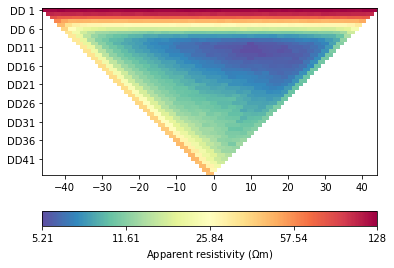

In [15]:
data.remove(data['rhoa'] < 0)
pg.info('Filtered rhoa (min/max)', min(data['rhoa']), max(data['rhoa']))

# You can save the data for further use
data.save('simple.dat')

# You can take a look at the data
ert.show(data)


In [16]:
mgr = ert.ERTManager('simple.dat')
ert.show(data, data["err"]*100, label="error (%)")

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x1edbbcb5820>)

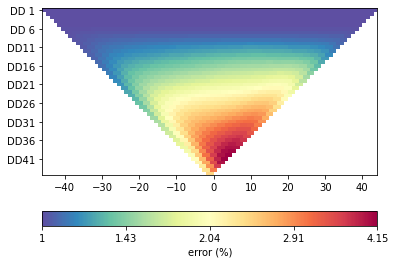

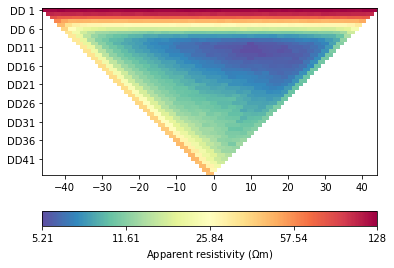

In [18]:
ert.show(data)
plt.savefig("MODEL3.jpg",dpi=1200, bbox_inches="tight") 

02/12/22 - 15:34:21 - pyGIMLi - INFO - Use median(data values)=11.0917789072079
02/12/22 - 15:34:21 - pyGIMLi - INFO - Created startmodel from forward operator: 3932 [11.0917789072079,...,11.0917789072079]
02/12/22 - 15:34:21 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001EDBBC2F9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001EDBBC2F900>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001EDBBC2FA40>
min/max (data): 5.21/128
min/max (error): 1%/4.15%
min/max (start model): 11.09/11.09
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 783.09 (dPhi = 69.77%) lam: 5.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 126.26 (dPhi = 83.71%) lam: 5.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 42.75 (dPhi = 65.32%) lam: 5.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 16.82 (dPhi = 58.67%) lam: 5.0
----------------------------------------------------

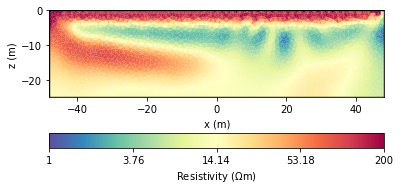

In [20]:
import matplotlib.pyplot as plt
import numpy as np
inv = mgr.invert(lam=5, paraMaxCellSize=1,
paraBoundary=0, paraDepth=25, verbose=True)
mgr.showResult(cMin=1, cMax=200, xlabel="x (m)", ylabel="z (m)")
plt.savefig("MODEL4.jpg",dpi=1200, bbox_inches="tight") 

04/12/22 - 11:18:52 - pyGIMLi - INFO - Use median(data values)=11.0917789072079
04/12/22 - 11:18:52 - pyGIMLi - INFO - Created startmodel from forward operator: 3932 [11.0917789072079,...,11.0917789072079]
04/12/22 - 11:18:52 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001EDBBC2F9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001EDBBC2F900>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001EDBBC2FA40>
min/max (data): 5.21/128
min/max (error): 1%/4.15%
min/max (start model): 11.09/11.09
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 504.37 (dPhi = 62.61%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 20.53 (dPhi = 93.0%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 13.37 (dPhi = 18.63%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 6.36 (dPhi = 23.43%) lam: 100.0
-----------------------------------------------

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x1ede53da4c0>)

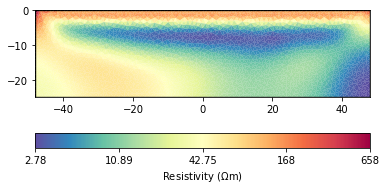

In [22]:
import matplotlib.pyplot as plt
import numpy as np
inv = mgr.invert(lam=10, paraMaxCellSize=1,
paraBoundary=0, paraDepth=25, verbose=True)
mgr.showResult()

04/12/22 - 14:41:06 - pyGIMLi - INFO - Use median(data values)=11.0917789072079
04/12/22 - 14:41:06 - pyGIMLi - INFO - Created startmodel from forward operator: 3932 [11.0917789072079,...,11.0917789072079]
04/12/22 - 14:41:06 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001EDBBC2F9A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001EDBBC2F900>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001EDBBC2FA40>
min/max (data): 5.21/128
min/max (error): 1%/4.15%
min/max (start model): 11.09/11.09
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 582.32 (dPhi = 67.85%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 44.15 (dPhi = 91.73%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 7.51 (dPhi = 75.78%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 3.01 (dPhi = 38.31%) lam: 20.0
---------------------------------------------------

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x1edbbdccb80>)

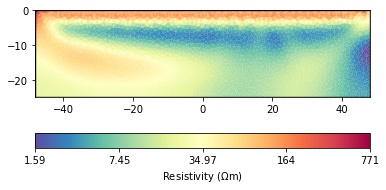

In [24]:
import matplotlib.pyplot as plt
import numpy as np
inv = mgr.invert( paraMaxCellSize=1,
paraBoundary=0, paraDepth=25, verbose=True)
mgr.showResult()

In [ ]:
plt.savefig("BERT_wa.jpg",dpi=1200, bbox_inches="tight") 